In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Wed Nov  1 20:42:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    48W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 13.8 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 27.1/166.8 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 83.48 GB
CPU                 Intel Xeon 2.20GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.3>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [5]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 363MB/s]


In [6]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/dataset/data.yaml epochs=30 imgsz=640

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/dataset/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

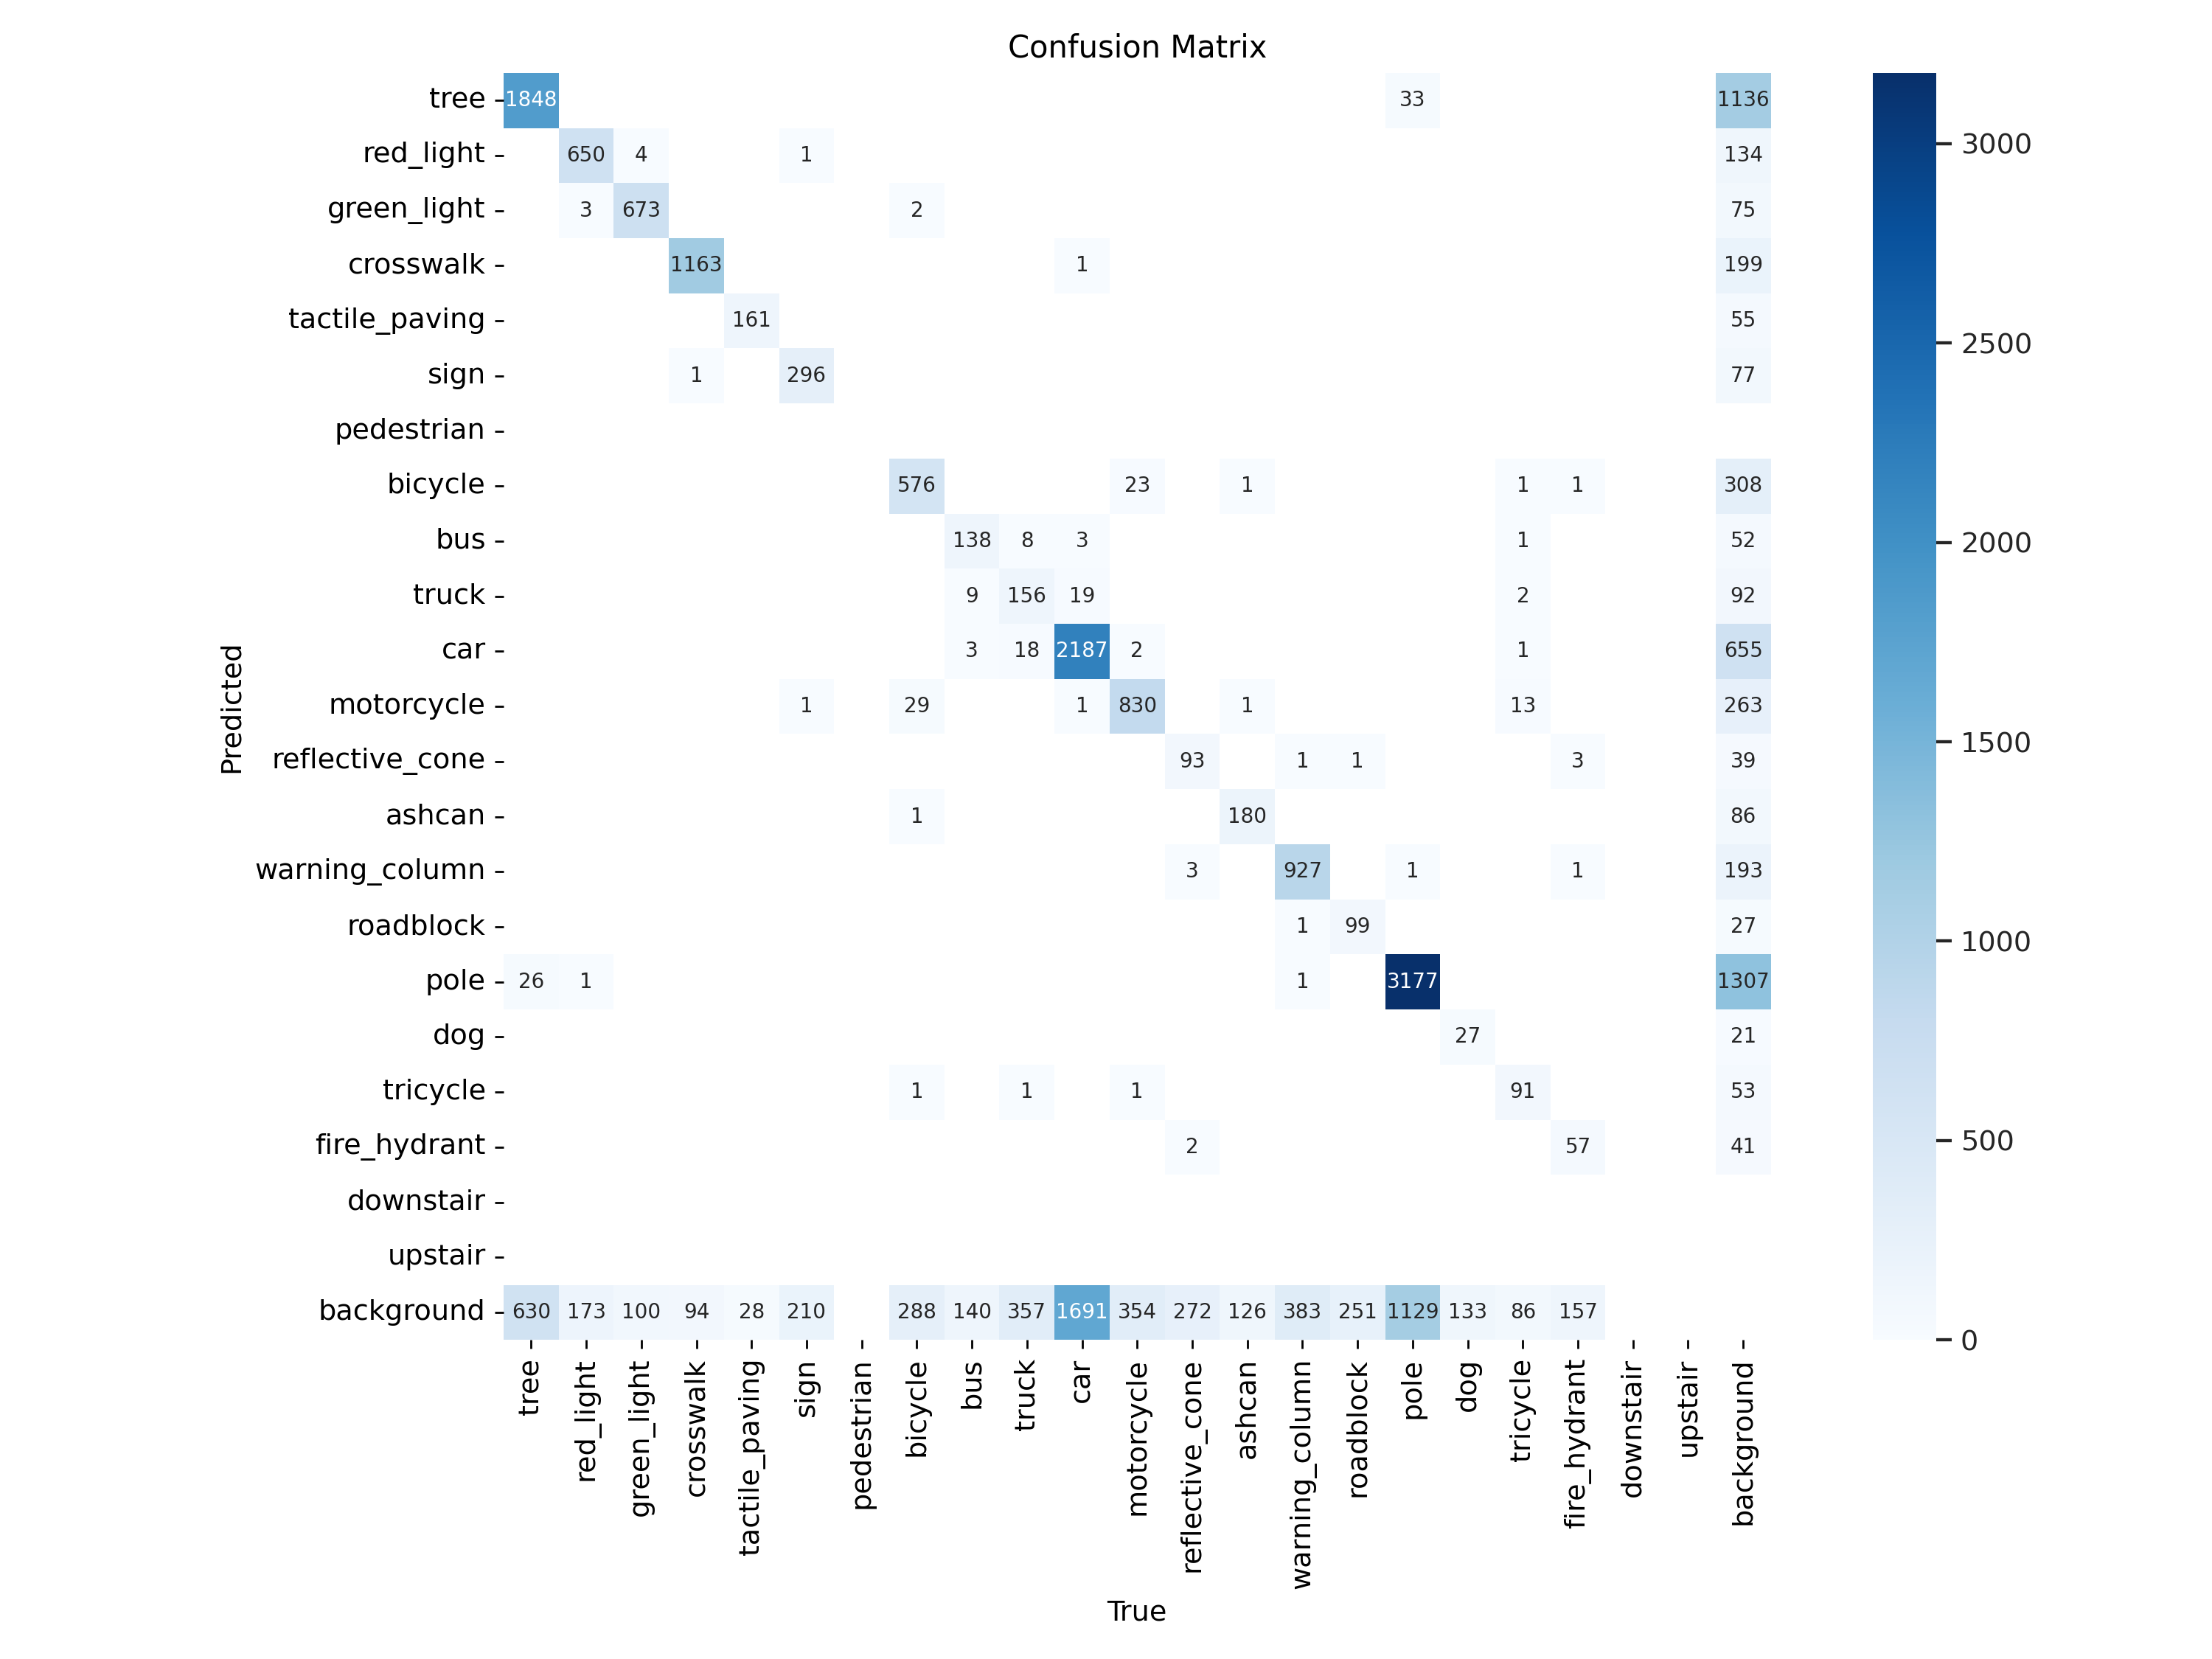

In [7]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

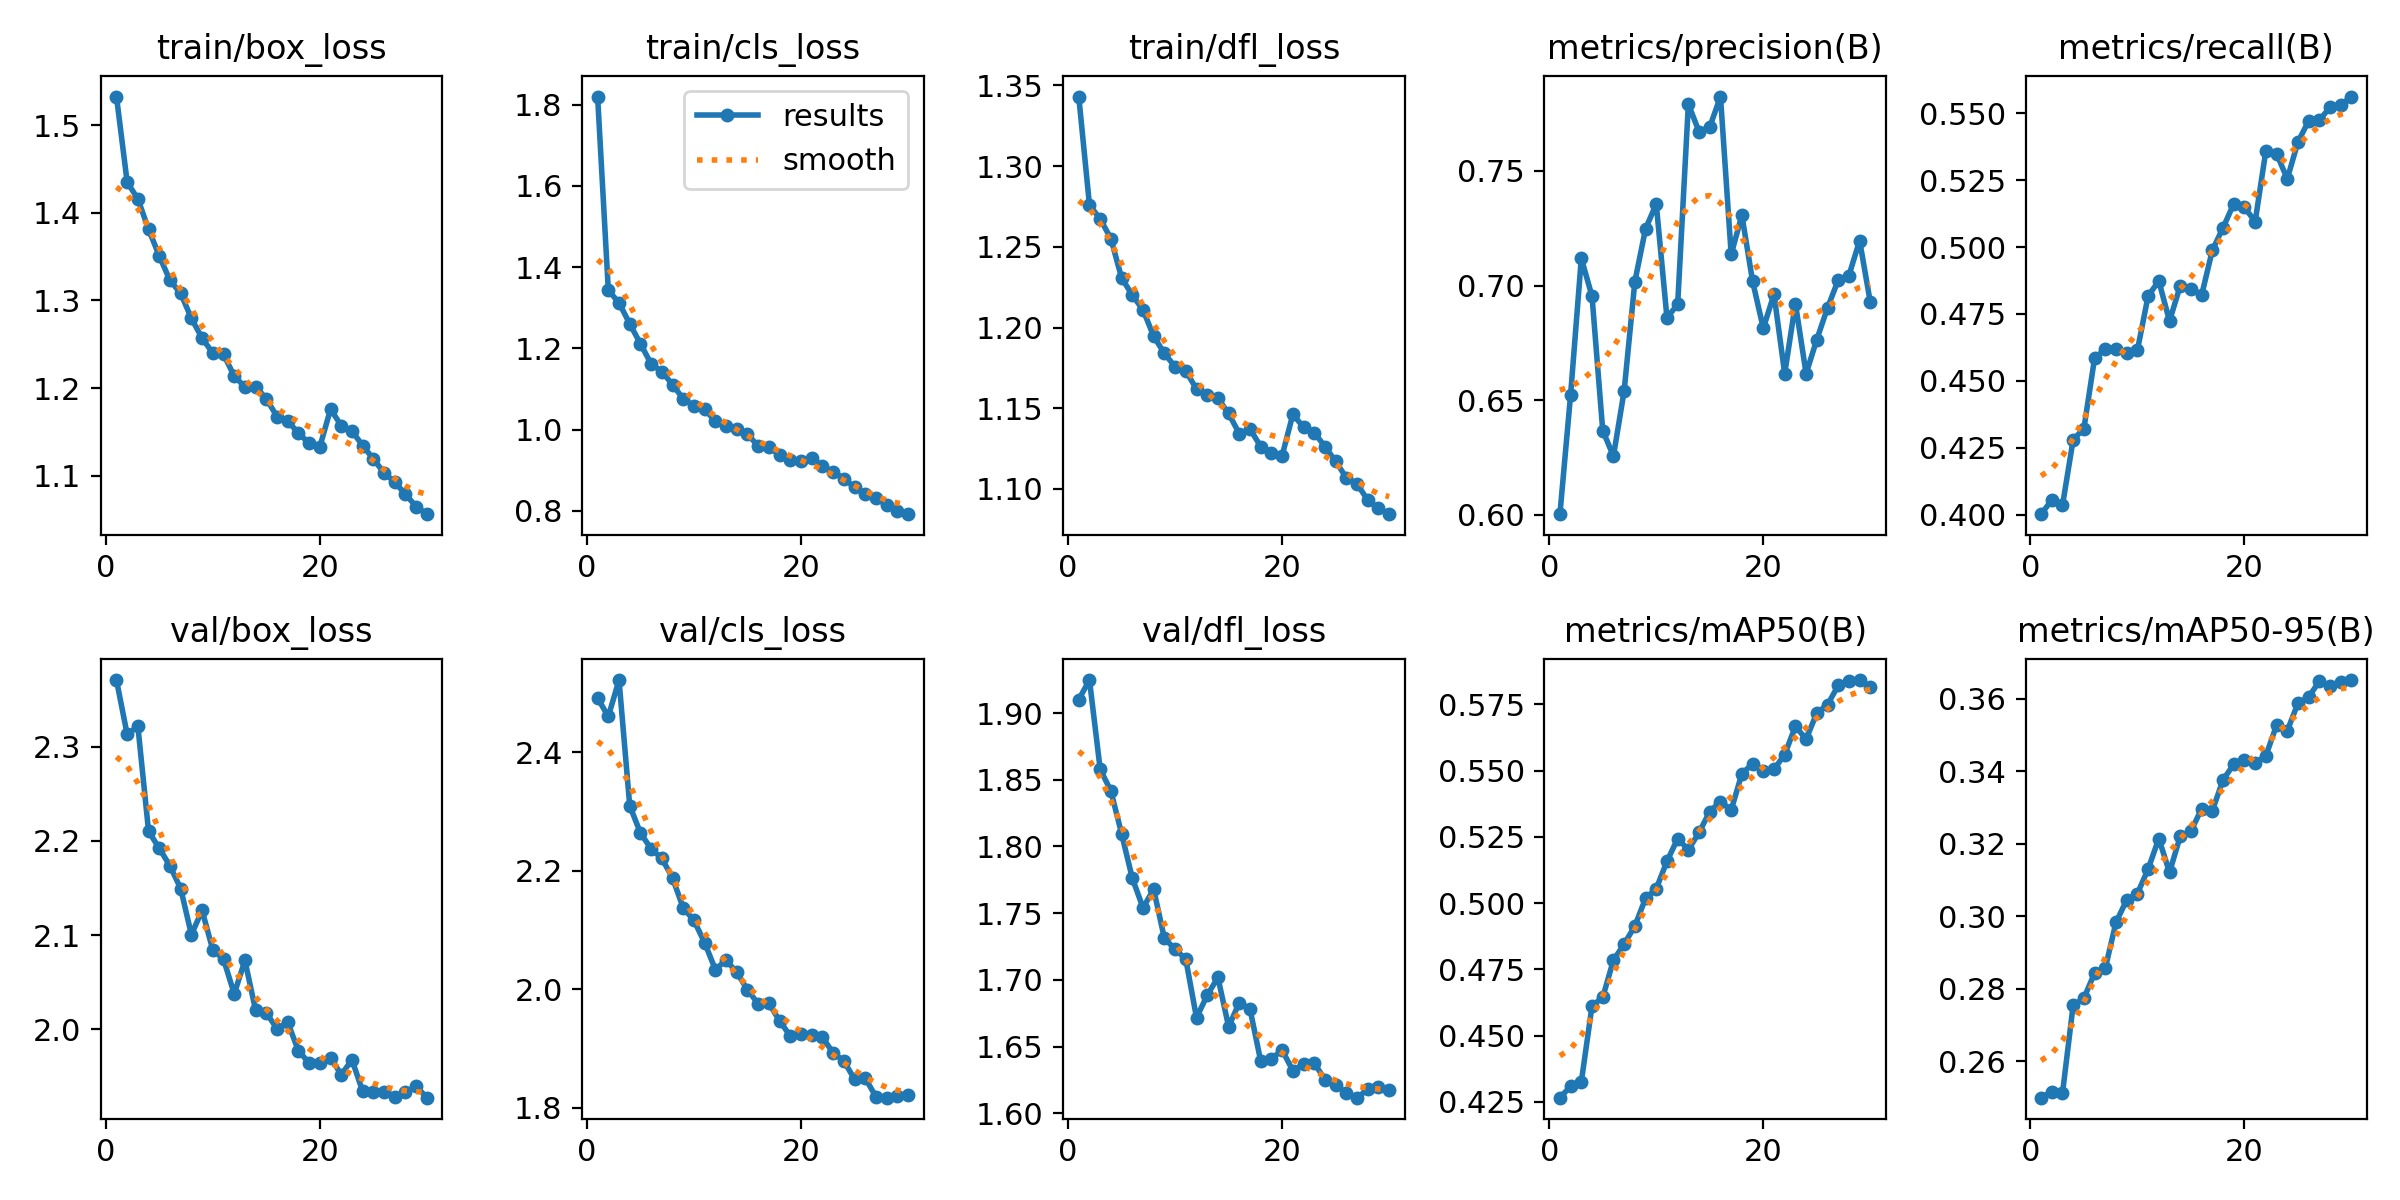

In [8]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [10]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/dataset/data.yaml

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25852498 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /content/drive/MyDrive/dataset/val/labels.cache... 2133 images, 17 backgrounds, 0 corrupt: 100% 2133/2133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 134/134 [00:18<00:00,  7.30it/s]
                   all       2133      20158      0.695      0.556      0.582      0.366
                  tree       2133       2504      0.628      0.724      0.719      0.394
             red_light       2133        827      0.818      0.781      0.801      0.529
           green_light       2133        777      0.902      0.866      0.891      0.597
             crosswalk       2133       1258      0.863      0.924      0.936      0.803
        tactile_paving       2133        189      0.682      0.815      0.784      0.552
                  s

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/drive/MyDrive/dataset/test/images

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25852498 parameters, 0 gradients, 78.8 GFLOPs

image 1/2452 /content/drive/MyDrive/dataset/test/images/1011118834ba4874_output_jpg.rf.cbc8d39cc2acc1102d138edbfb25eb48.jpg: 640x640 (no detections), 11.7ms
image 2/2452 /content/drive/MyDrive/dataset/test/images/12722216_output_jpg.rf.62bb8ffcd25f25a6e8978e1732c78897.jpg: 640x640 (no detections), 10.3ms
image 3/2452 /content/drive/MyDrive/dataset/test/images/1662059276_output_jpg.rf.698d391868395961869649de89d11333.jpg: 640x640 (no detections), 9.6ms
image 4/2452 /content/drive/MyDrive/dataset/test/images/16flip_output_jpg.rf.2fbdd4cae684be6d6b5f9bc63538454d.jpg: 640x640 1 downstair, 9.6ms
image 5/2452 /content/drive/MyDrive/dataset/test/images/1985147069_output_jpg.rf.5b0d1959e3cdfc043cfe93529d6f8e88.jpg: 640x640 (no detections), 9.7ms
image 6/2452 /content/drive/MyDrive/dataset/test/images/20000009.jpg:

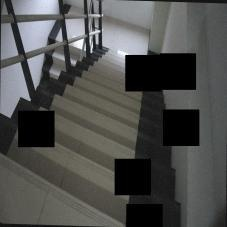

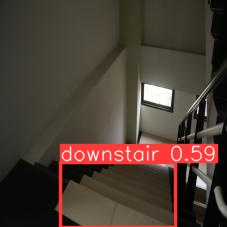

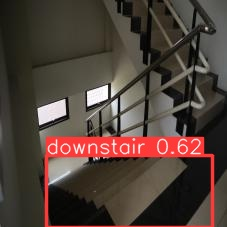

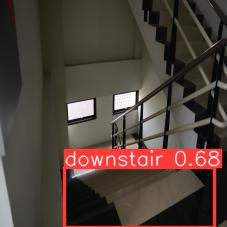

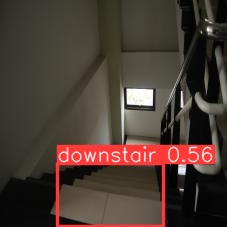

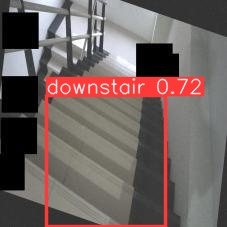

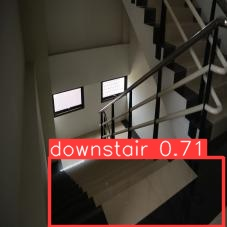

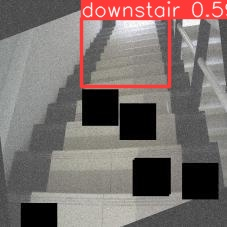

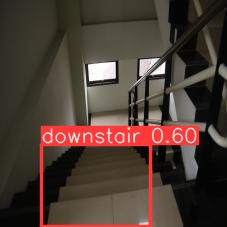

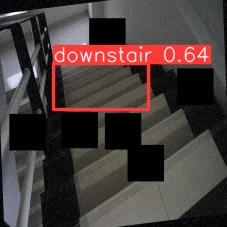

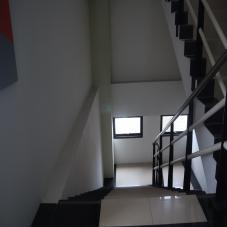

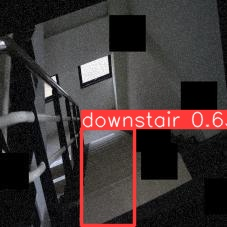

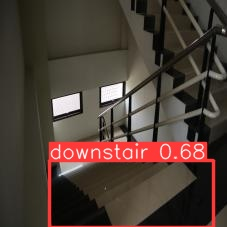

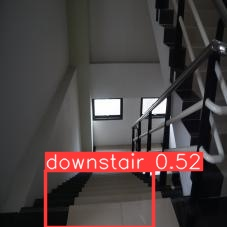

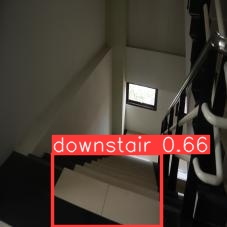

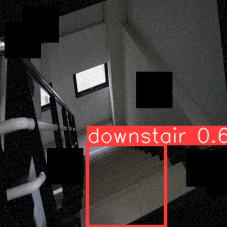

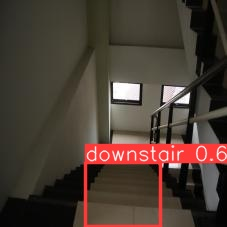

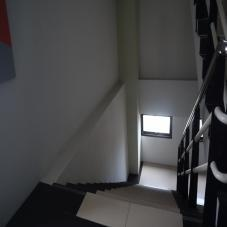

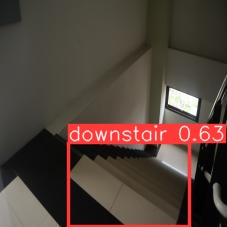

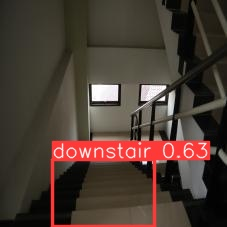

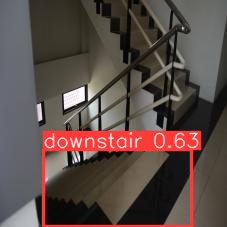

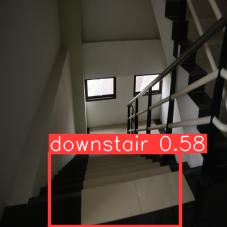

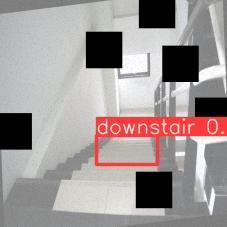

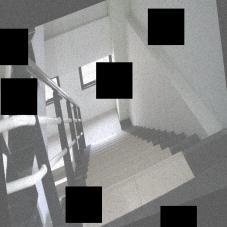

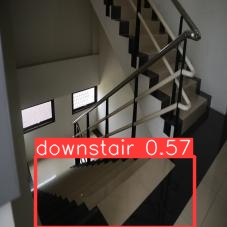

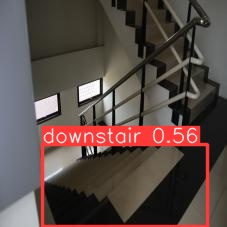

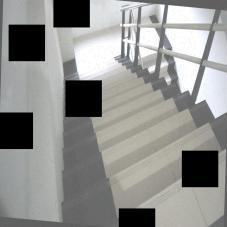

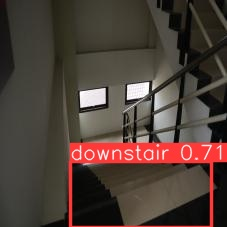

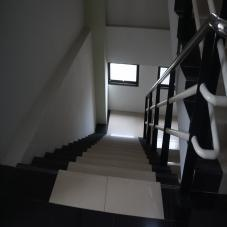

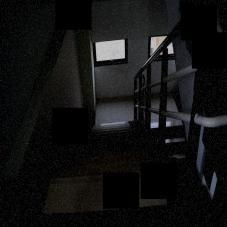

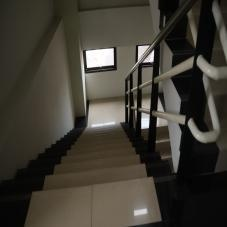

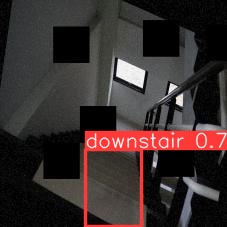

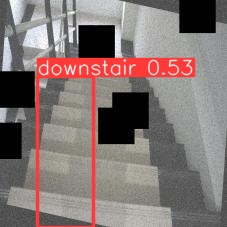

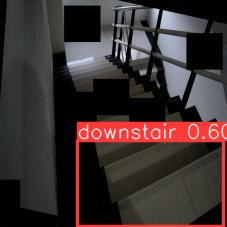

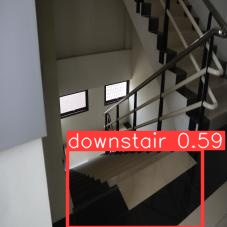

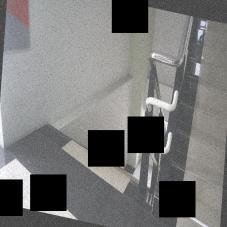

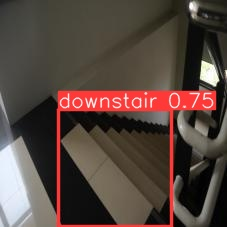

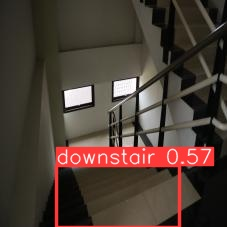

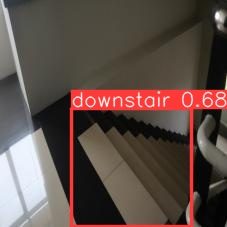

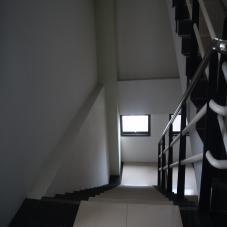

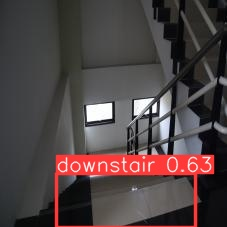

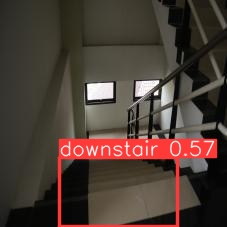

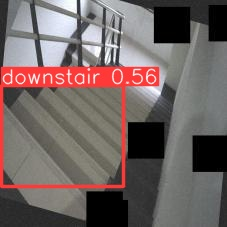

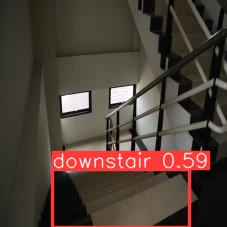

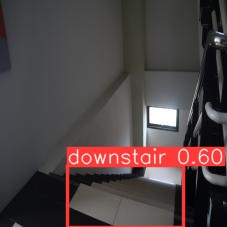

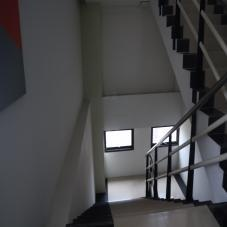

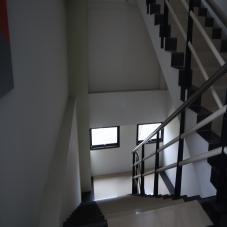

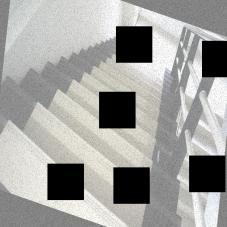

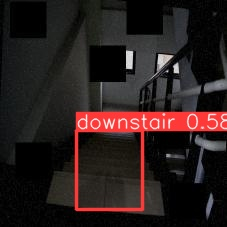

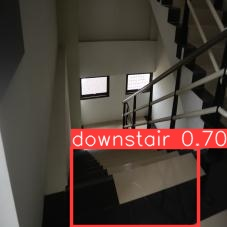

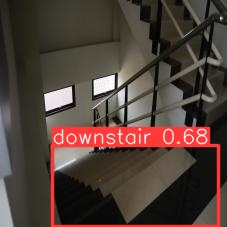

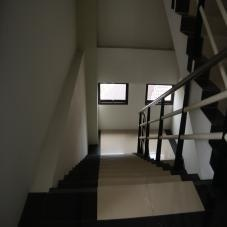

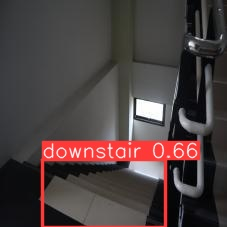

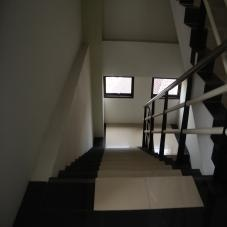

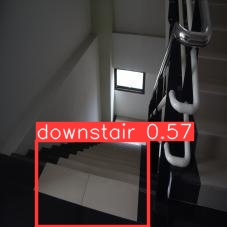

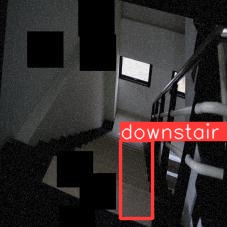

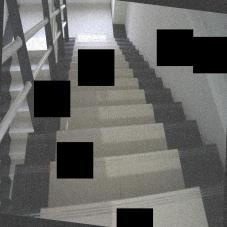

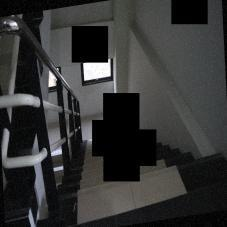

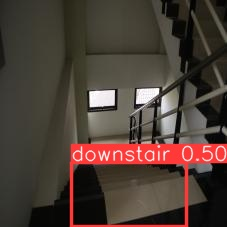

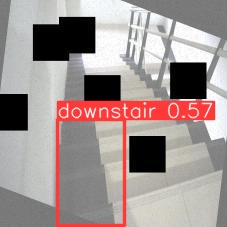

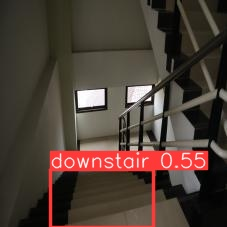

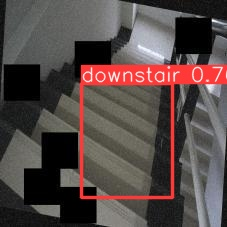

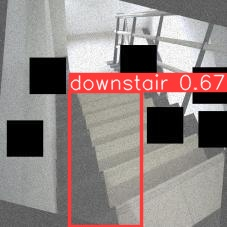

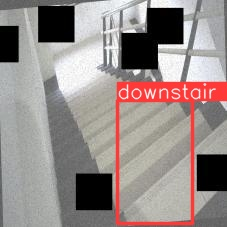

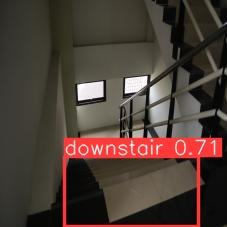

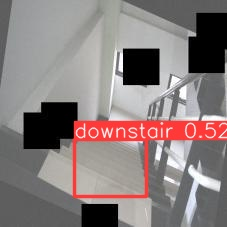

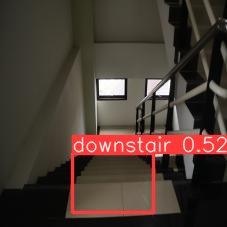

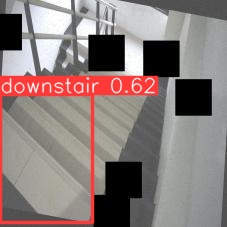

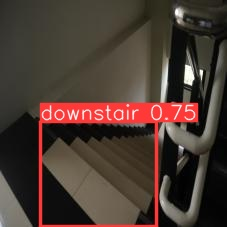

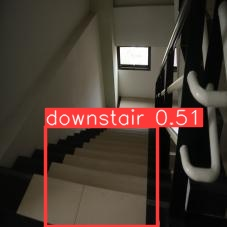

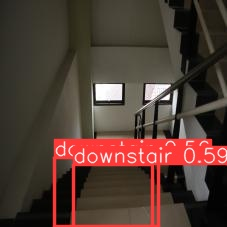

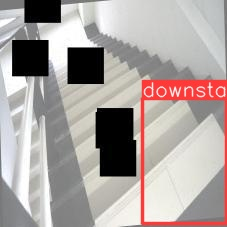

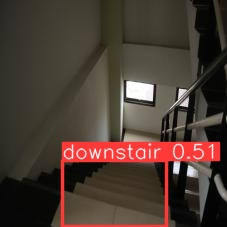

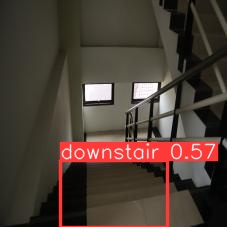

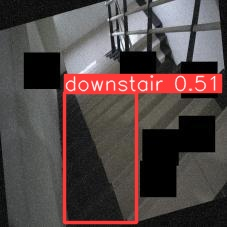

In [16]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/Turun*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")